# demo01_svm  支持向量机

             precision    recall  f1-score   support

        0.0       1.00      0.91      0.95        45
        1.0       0.88      1.00      0.94        30

avg / total       0.95      0.95      0.95        75



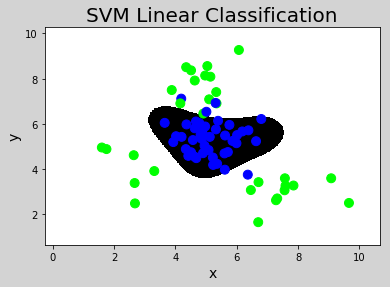

In [20]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [], []
data = np.loadtxt('../data/multiple2.txt', delimiter=',', dtype='f8')
x = data[:, :-1]
y = data[:, -1]
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25, random_state=5)
# 基于线性核函数的支持向量机分类器
model = svm.SVC(kernel='rbf', class_weight={0:1, 1:5})
model.fit(train_x, train_y)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))    
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
mp.figure('SVM Linear Classification', facecolor='lightgray')
mp.title('SVM Linear Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
mp.show()